<table width=100%>
<tr>
    <td><h1 style="text-align: left; font-size:300%;">
       Protein Expression in Mice with Down Syndrome
    </h1></td>
    <td width="20%">
    <div style="text-align: right">
    <b> Homework Machine Learning 2020</b> 
    <br> Emanuel Michele Soda <br>
    <a href="emanuelmichele.soda@mail.polimi.it">emanuelmichele.soda@mail.polimi.it</a><br>
    </div>
    </td>
    <td width="111px"> 
        <a href="https://www.polimi.it">
        <img align="right", width="95px" src='https://labolfattometrico.chem.polimi.it/wp-content/uploads/2019/12/POLIMI-corretto-3-1024x1024.jpg' alt=''>
        </a>
    </td>
</tr>
</table>

# Importing Packages 

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import sklearn as sk
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from sklearn.feature_selection import SelectKBest   #ricordali di toglierli nel caso non servono 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
np.random.seed(0)

# Loding data and Data Preparation

In [2]:
train = pd.read_csv("Data/train.csv")
train.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,class
0,0.650511,1.158653,0.580172,2.230388,3.179675,0.533686,0.440101,5.033898,0.200985,1.589221,...,0.047287,0.337121,0.203356,0.191360,0.590874,0.112145,0.110109,0.160637,1.329248,t-CS-m
1,0.365907,0.651296,0.810468,2.597217,4.131603,0.537554,0.249235,6.099538,0.226362,1.700578,...,0.521112,0.419544,0.231619,0.393897,0.252572,0.352687,0.085545,0.328537,1.008023,t-SC-s
2,0.260145,0.397996,0.229522,2.643311,4.303648,0.268394,0.050916,3.130455,0.273792,2.534531,...,0.047407,0.053130,0.096325,0.257402,0.246015,0.203979,0.039188,0.008315,1.193634,c-SC-s
3,0.239489,0.271240,0.766816,1.872419,2.424971,0.322269,0.386791,2.351832,0.034265,0.472725,...,0.273651,0.162382,0.234056,0.180657,0.351388,0.103896,0.302341,0.166020,0.689970,c-CS-m
4,0.617112,0.751737,0.050685,2.356175,3.494138,0.506875,0.310644,3.855825,0.309879,1.033428,...,0.172488,0.014086,0.191145,0.149622,0.310434,0.151685,0.180055,0.383039,1.737274,t-CS-s


## Get Class Labels

In [3]:
labelClass = train['class'] # the class column
le = preprocessing.LabelEncoder()
codedLabel = le.fit_transform(labelClass)  # fitta il trasformatore e mi ritorna le label 
#codedLabel = le.transform(labelClass)

In [4]:
train = train.drop(columns = 'class', axis = 1)

## Dataset Splitting 

Spleatting the training to obtain the validation set

In [5]:
train_x, validation_x, train_y, validation_y = train_test_split(train, codedLabel, test_size = 0.20, random_state = 42)
#train_x.shape (293, 76)
#train_y.shape (293,)
#validation_x.shape (74, 76)
#validation_y.shape (74,)

## Preliminary Analysis 

### Data visualizzation 

In order to have an idea of our data, we can plot them to see if they are correleted. We can think of using the pairplot to show how each feature is correlated to the other but this is impossible due to the high number of features. We can instead, to begin with, plotting the correlation matrix. And then tray to reduce the number of features.

As we can see using the correlation matrix the features are moderately correlated.

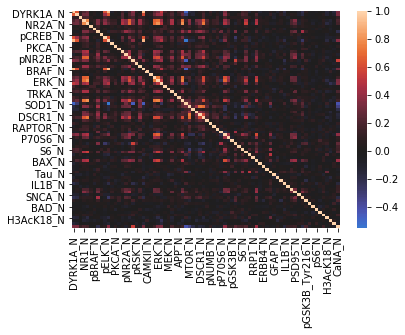

In [6]:
# Create correlation matrixc
def visualizeCorrMat(data):
    plt.figure() #figsize = (12,10)
    sns.heatmap(data, center = 0)

corrMat = train.corr()
visualizeCorrMat(corrMat)

## Variance visualizzation

In ordert to understand our daset we show the variance among the features, it is always a good practice to analyze the variance to understand if our data need normalization. In our particolar in our dataset presentslots of features with low variance e some features with high variance.

Max Variance value :	 1.926769317467468
Min Variance value :	 0.00040275706051909544
Mean Variance value:	 0.09739601260421206


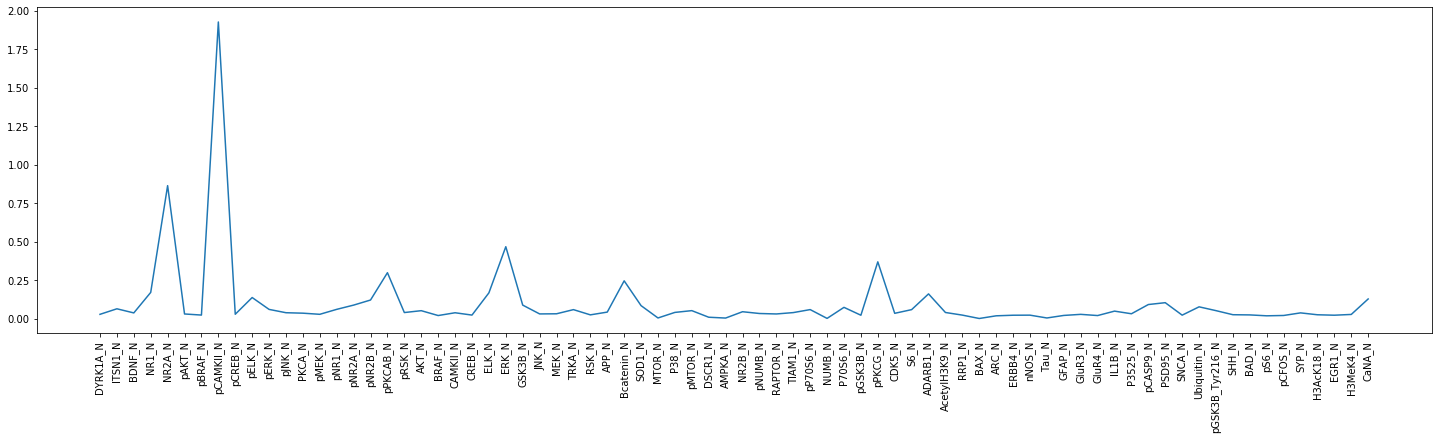

In [7]:
def varianceVisualization(data):
    print("Max Variance value :\t", data.var().max())
    print("Min Variance value :\t", data.var().min())
    print("Mean Variance value:\t", data.var().mean())
    plt.figure(figsize = (25, 6))
    plt.xticks(rotation = 90)
    plt.plot(data.var())
    
varianceVisualization(train)

## Data normalization 

In order to deal with this problem we perform a data normalizaion, using the min_max_scaler

Max Variance value :	 0.05608058839860816
Min Variance value :	 0.014765655910366304
Mean Variance value:	 0.0353125299022305


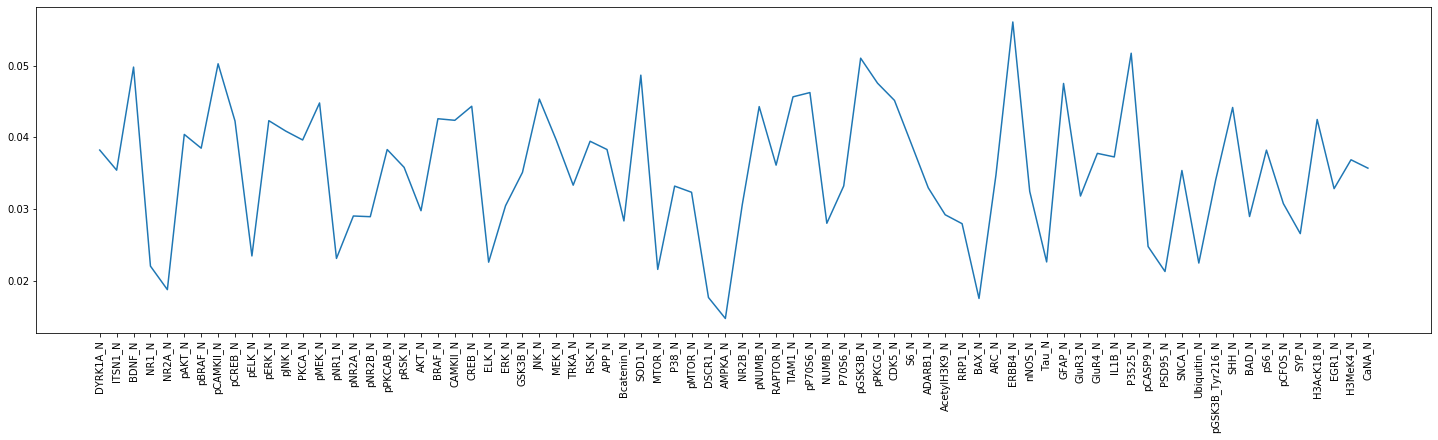

In [8]:
min_max_scaler = preprocessing.MinMaxScaler().fit(train)
train = pd.DataFrame(min_max_scaler.transform(train), columns = train.columns)
varianceVisualization(train)

### Data visualization

Let's have a look at the data, in order to do this we select the first 3 principal component 

In [9]:
# calcola le Principal Component e la percentuale di variazione espressa da queste
def principalComponent(data, n_comp):
    #scaled_Train = scale(train.drop(['class'], axis = 1))
    pca = PCA(n_comp) 
    return pca.fit_transform(data), np.round(pca.explained_variance_ratio_ * 100, decimals = 1), pca.singular_values_

principalComp, per_var, singular_values = principalComponent(train, min(train.shape))
#principalComp.shape
#singular_values

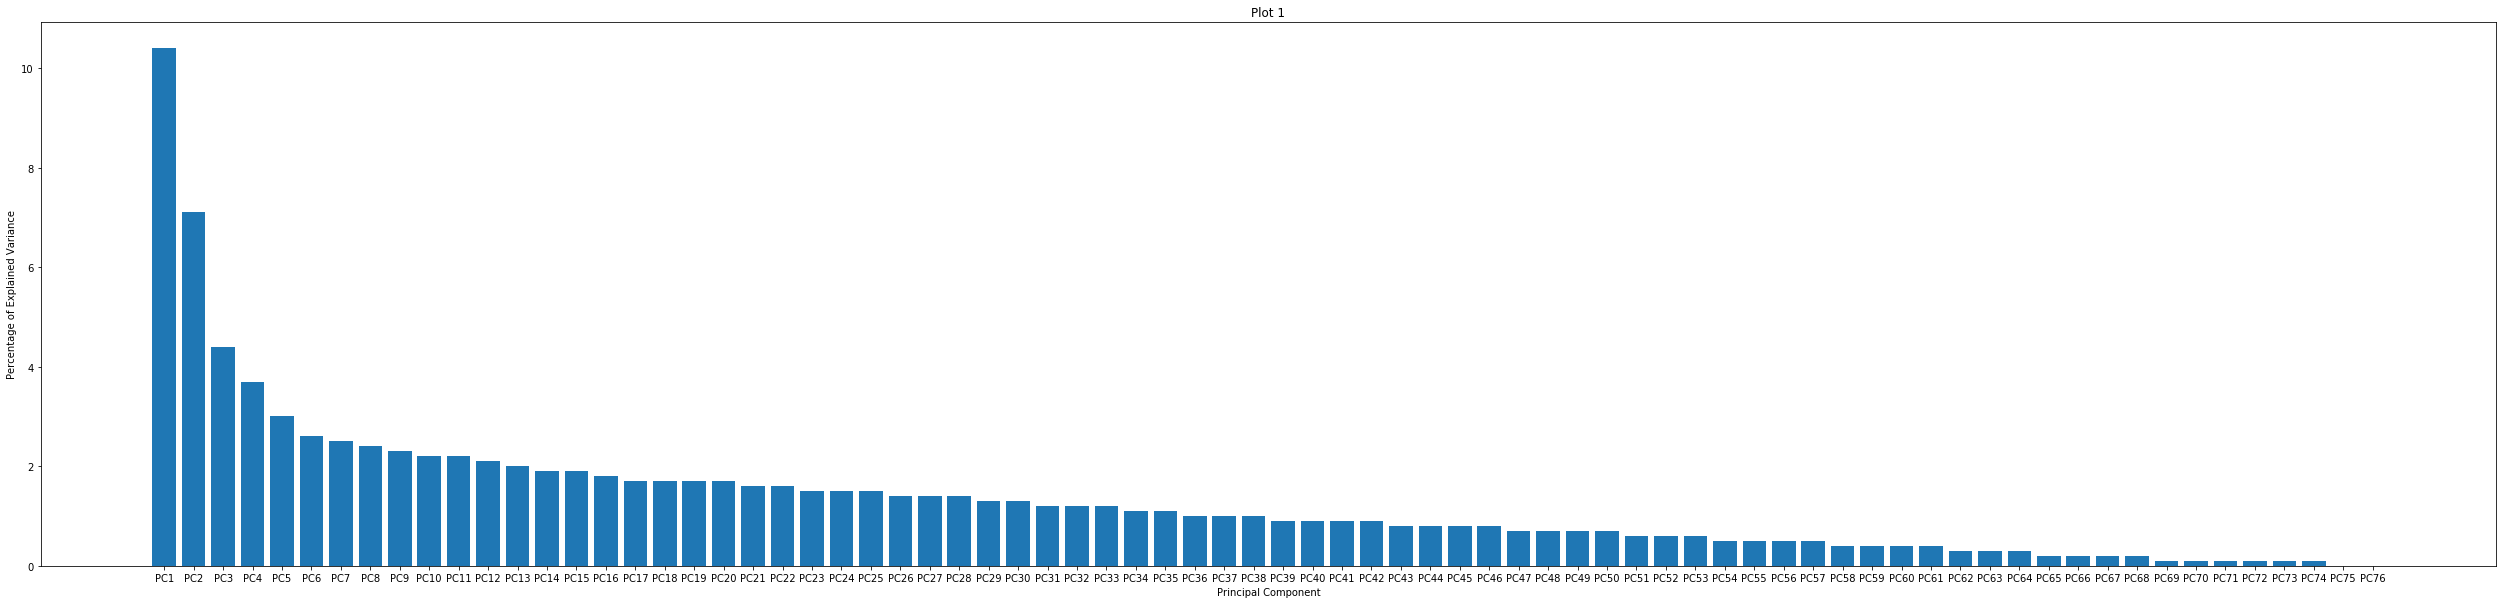

In [10]:
def visualizePrincipalComponentVar(per_var):
    plot_labels = ['PC' + str(s) for s in range(1, len(per_var) + 1)]
    plt.figure(figsize = (44, 10))
    plt.bar(x = range(1, len(per_var) + 1), height = per_var, tick_label = plot_labels)
    plt.ylabel('Percentage of Explained Variance', )
    plt.xlabel('Principal Component')
    plt.title('Plot 1')
    plt.show()
    return plot_labels

plot_labels = visualizePrincipalComponentVar(per_var)

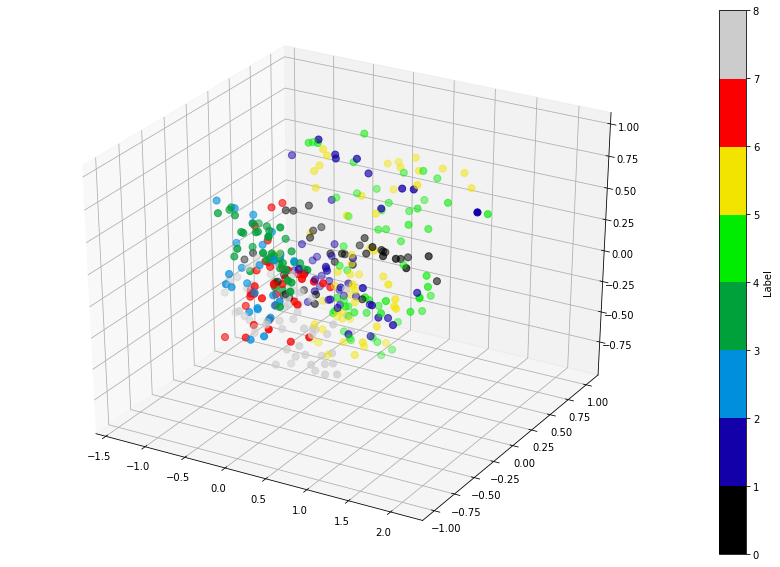

In [197]:
def plotPCA(Label, pc):
    unique_labelClass = np.unique(Label) 
    nlabels = len(unique_labelClass) 
    fig = plt.figure(figsize = (15, 10))
    ax = fig.add_subplot(111, projection = '3d')
    col = ('tab10' if nlabels <= 10 else  ('tab20' if nlabels <= 20 else 'hsv'))
    cmap = plt.cm.get_cmap('nipy_spectral', 8)
    smap = cm.ScalarMappable(norm = mcolors.Normalize(unique_labelClass.min(), unique_labelClass.max() + 1),   cmap = cmap)
    ax.scatter(xs = pc.PC1, ys = pc.PC2, zs = pc.PC3, marker = '.', s = 200, 
               c = Label, cmap = cmap)
    plt.colorbar(mappable = smap, label = 'Label')

#per ora ho ignorato " _ " la percentuale di varianza espressa
pc_plot, _ = principalComponent(train, 3)
pc_plot = pd.DataFrame(pc_plot, columns = plot_labels[0 : 3])


plotPCA(codedLabel, pc_plot)

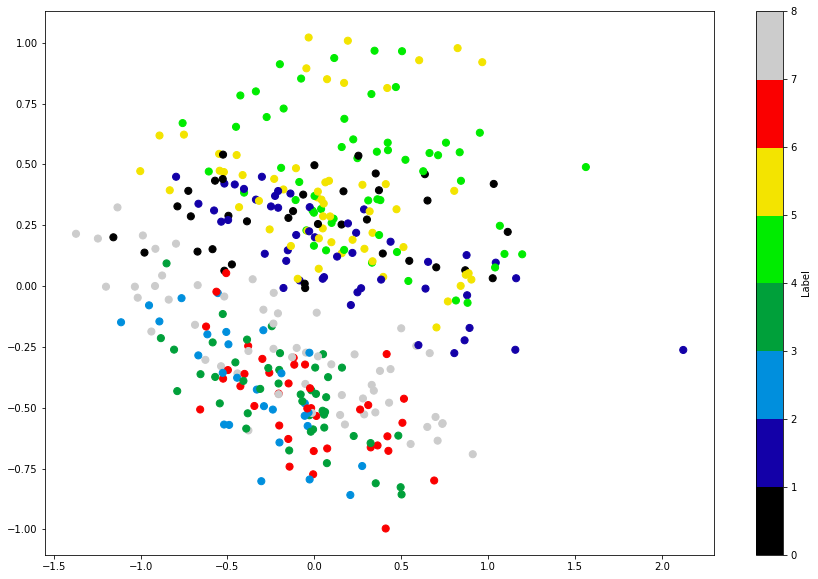

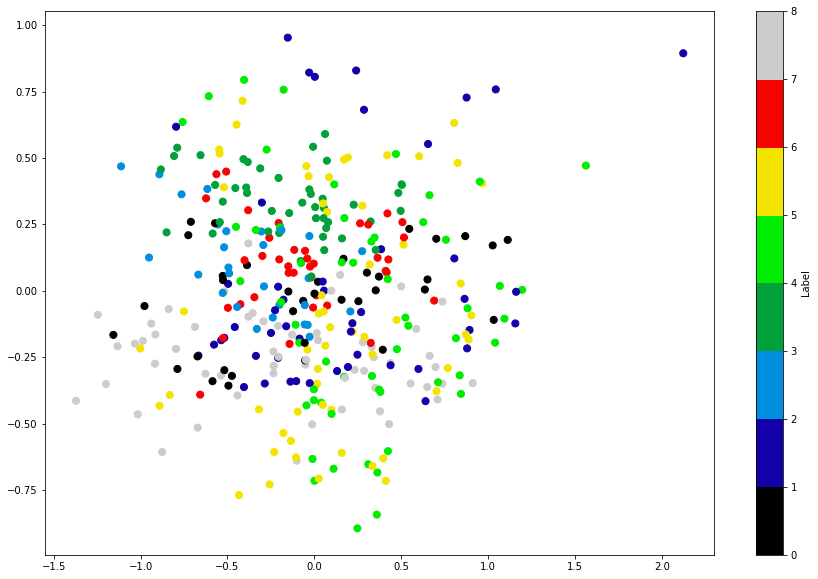

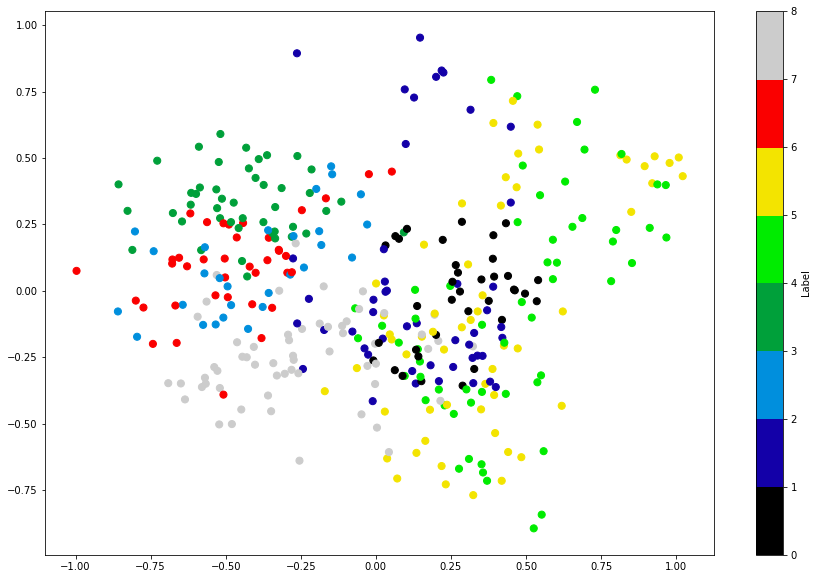

In [198]:
def plot2dPCA(Label, pc1, pc2):
    unique_labelClass = np.unique(Label) 
    nlabels = len(unique_labelClass) 
    fig = plt.figure(figsize = (15, 10))
    col = ('tab10' if nlabels <= 10 else  ('tab20' if nlabels <= 20 else 'hsv'))
    cmap = plt.cm.get_cmap('nipy_spectral', 8)
    smap = cm.ScalarMappable(norm = mcolors.Normalize(unique_labelClass.min(), 
                                                      unique_labelClass.max() + 1),cmap = cmap)
    plt.scatter(x = pc1, y = pc2, marker = '.', s = 200, c = Label, cmap = cmap)
    plt.colorbar(mappable = smap, label = 'Label')
      
plot2dPCA(codedLabel, pc_plot.PC1, pc_plot.PC2)
plot2dPCA(codedLabel, pc_plot.PC1, pc_plot.PC3)
plot2dPCA(codedLabel, pc_plot.PC2, pc_plot.PC3)

## Clustering

Silhouette_score:  0.06195361075152521


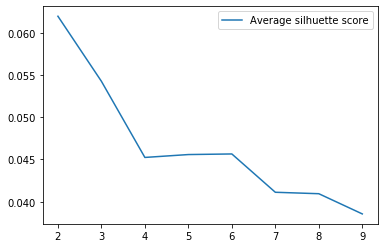

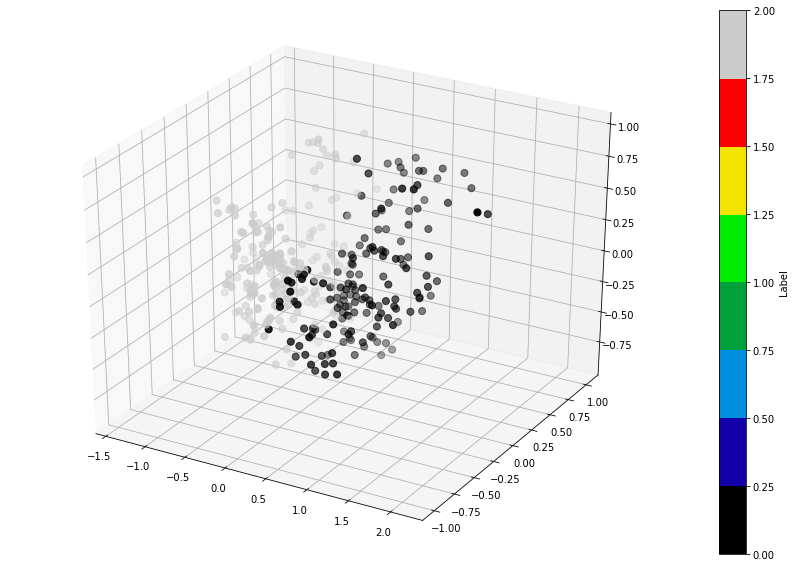

In [324]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clus_list = list(range(2, 10)) # non può esserci solo un cluster 
scores = []
for i in clus_list: 
    kmeans_prova = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, random_state = 42)
    scores.append(silhouette_score(train, kmeans_prova.fit_predict(train), metric = 'euclidean'))      

plt.plot(clus_list, scores, label = 'Average silhuette score')
plt.legend()


# according to the silhouette the best k = 2
k = 2
kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
y_predict = kmeans.fit_predict(train)

print("Silhouette_score: ", silhouette_score(train, kmeans.fit_predict(train), metric = 'euclidean'))
plotPCA(y_predict, pc_plot)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

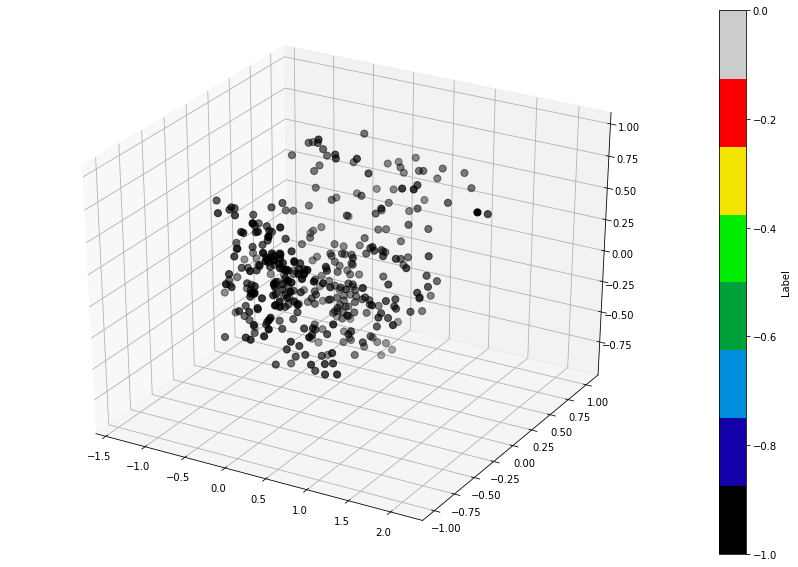

In [326]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.05, min_samples = 5)
dbscan.fit(train)
#dbscan.labels_
y_predict_dbscan = dbscan.fit_predict(train)

plotPCA(y_predict_dbscan, pc_plot)

In [344]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(Z=None, model=None, X=None, **kwargs):
    annotate_above = kwargs.pop('annotate_above', 0)

    # Reconstruct the linakge matrix if the standard model API was used
    if Z is None:
        if hasattr(model, 'distances_') and model.distances_ is not None:
            # create the counts of samples under each node
            counts = np.zeros(model.children_.shape[0])
            n_samples = len(model.labels_)
            for i, merge in enumerate(model.children_):
                current_count = 0
                for child_idx in merge:
                    if child_idx < n_samples:
                        current_count += 1  # leaf node
                    else:
                        current_count += counts[child_idx - n_samples]
                counts[i] = current_count

            Z = np.column_stack([model.children_, model.distances_,
                                              counts]).astype(float)
        else:
            Z = linkage(X, method=model.linkage, metric=model.affinity)
    
    if 'n_clusters' in kwargs:
        n_clusters = kwargs.pop('n_clusters')
        # Set the cut point just above the last but 'n_clusters' merge
        kwargs['color_threshold'] = Z[-n_clusters, 2] + 1e-6
    
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)
    # Plot the corresponding dendrogram
    ddata = dendrogram(Z, ax=ax, **kwargs) 
    
    # Annotate nodes in the dendrogram
    for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
        x = 0.5 * sum(i[1:3])
        y = d[1]
        nid = np.where(Z[:,2] == y)[0][0]
        if y > annotate_above:
            plt.plot(x, y, 'o', c=c)
            plt.annotate(str(nid-Z.shape[0]), (x, y), xytext=(0, -5),
                         textcoords='offset points',
                         va='top', ha='center')
    if kwargs['color_threshold']:
        plt.axhline(y=kwargs['color_threshold'], c='k')
    
    return fig, ax

Silhouette_score:  0.03045287093095955


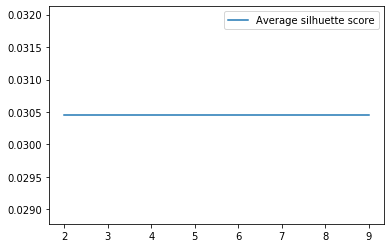

In [340]:
from sklearn.cluster import AgglomerativeClustering
distance_threshold=None#270
n_clusters = 8


agg = AgglomerativeClustering(n_clusters = n_clusters, 
                                distance_threshold = distance_threshold, 
                                affinity = 'euclidean')

y_predict_agg = agg.fit_predict(train)
print("Silhouette_score: ", silhouette_score(train, y_predict_agg, metric = 'euclidean'))
#plotPCA(y_predict_agg, pc_plot)


scores_agg = []
for i in clus_list: 
    model = AgglomerativeClustering(n_clusters = n_clusters, 
                                distance_threshold = distance_threshold, 
                                affinity = 'euclidean')
    scores_agg.append(silhouette_score(train, model.fit_predict(train), metric = 'euclidean'))      

plt.plot(clus_list, scores_agg, label = 'Average silhuette score')
plt.legend()



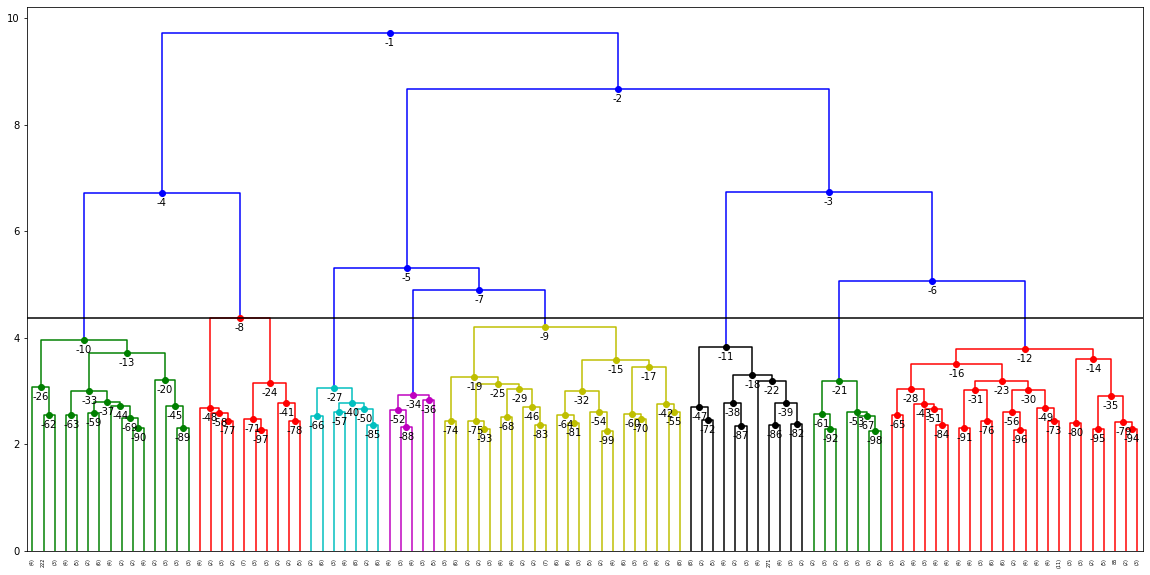

In [347]:
Z = linkage(train, metric = 'euclidean', method = 'ward')
fig, ax = plot_dendrogram(Z = Z, X = train, truncate_mode = 'lastp', 
                          p = 100, n_clusters = 8)


## Feature Selection 

We have to performe the feature selection in orther to reduce the dimensionality of the features speace. This will lower the training time and also increasing the performance of the model that we will train. The first idea that we can think of is, remove the features that have low variance. Infact, our model will not learn very much from feature that aren't spread along the features space.

In [178]:
# prova features selection con VarianceThreshold
from sklearn.feature_selection import VarianceThreshold
def VarianceThreshold_selector(data, threshold = 0.04531252990223051): #.05
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices = True)]]

In [181]:
var_selected = VarianceThreshold_selector(train)
len(list(var_selected.columns)) #['NR1_N', 'NR2A_N', 'pCAMKII_N', 'pPKCAB_N', 'ELK_N', 'ERK_N', 'Bcatenin_N','pPKCG_N', 'ADARB1_N']
#sns.pairplot(train[list(var_selected.columns)]) # MI FAI IL PAIRPLOT DELLE FEATURES SELEZIONATE

10

In [31]:
# QUI TOLGO SOLO QUELLE CON CORRELAZIONE ALTA.. MA ME NE TROVA SOLO 2 QUINDI NON MOLTO UTILE....

# Select upper triangle of correlation matrix
#upper = corrMat.where(np.triu(np.ones(corrMat.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.90
#to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
#to_drop

# Drop features 
#prova = train.drop(train[to_drop], axis = 1)
#prova.shape

In [32]:
#histogramma media dell'espressione per gene 
#prova = train.iloc[:, 0 : len(train.columns)].mean().to_numpy()
#prova
#prova.shape
#sum(prova = 3)
#sns.distplot(prova)

Another possible way is to use lasso iin orther to tray to solve the problem of features selection approximation the best subsect selection problem.

As we know the lasso has a penalization term that can be tuned by an hyperparameter. So in order to try to find the best hyper parameter we use performe a Grid search.

In [61]:
lasso_params = {'fit__alpha':[0.005, 0.02, 0.03, 0.05, 0.06]}



In [ ]:
import sklearn.linear_model as linear_model

estimator = GridSearchCV(linear_model.Lasso(), param_grid = lasso_params , return_train_score = True, cv = 10).fit(train, codedLabel)
#best_estimator = estimator.best_estimator_
#best_estimator.alpha
#estimator.best_score_

In [59]:
estimator.get_params().keys()

NameError: name 'estimator' is not defined

In [228]:
# Scelgo il modello per ridurre le features scelgo: Lasso <--- o almeno così dovrebbe essere con l1 penalty 
sel = SelectFromModel(LogisticRegression(penalty = 'l1', solver = 'liblinear', C = best_estimator.alpha)) # più C è piccolo più riduce le features 
sel.fit(train, codedLabel)
features_lasso = train.columns[sel.get_support()]
features_lasso
train_trasform_lasso = sel.transform(train)
#train[features_lasso]

reg = LinearRegression().fit(train_x[features_lasso], train_y)
reg.score(validation_x[features_lasso], validation_y)
reg2 = LinearRegression().fit(train_x, train_y)
reg2.score(validation_x, validation_y)

SelectFromModel(estimator=LogisticRegression(C=0.02, class_weight=None,
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='auto',
                                             n_jobs=None, penalty='l1',
                                             random_state=None,
                                             solver='liblinear', tol=0.0001,
                                             verbose=0, warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

Index(['NR2A_N', 'pCAMKII_N', 'pPKCG_N'], dtype='object')

0.14727658770555285

0.4762534018614426

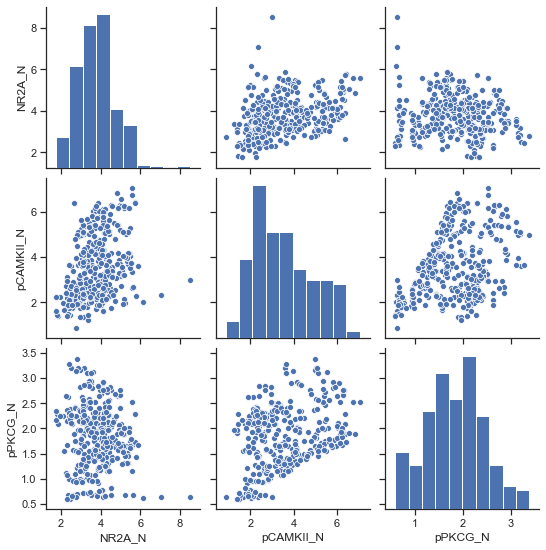

In [156]:
#sns.set(style = "ticks")
sns.pairplot(train[['NR2A_N', 'pCAMKII_N', 'pPKCG_N']])

## Feature Selection 

In [11]:
# scelgo il modello per ridurre le features prov: CON LINEAR REGRESSION
sel = SelectFromModel(LinearRegression())

In [12]:
#lo alleno
sel.fit(train, codedLabel)

SelectFromModel(estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                           n_jobs=None, normalize=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [13]:
# mi dice quali sono le features che sono state scelte
#sel.get_support()

In [14]:
# mi dice i coef di ogni feature
#sel.estimator_.coef_

In [15]:
# così mostro proprio il nome della features
features_linear = train.columns[sel.get_support()]
features_linear

Index(['DYRK1A_N', 'pCREB_N', 'pERK_N', 'BRAF_N', 'SOD1_N', 'MTOR_N',
       'DSCR1_N', 'AMPKA_N', 'NUMB_N', 'BAX_N', 'Tau_N', 'GFAP_N', 'SHH_N'],
      dtype='object')

In [16]:
# quindi il nostro nuovo train è così ottenuto
train_trasform_linear = sel.transform(train)
train_trasform_linear.shape
train.shape

(367, 13)

(367, 76)

In [68]:
# Scelgo il modello per ridurre le features scelgo: Lasso <--- o almeno così dovrebbe essere con l1 penalty 
sel = SelectFromModel(LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 3.0)) # più C è piccolo più riduce le features 
sel.fit(train, codedLabel)
features_lasso = train.columns[sel.get_support()]
features_lasso
train_trasform_lasso = sel.transform(train)
train_trasform_lasso.shape
train.shape
from sklearn.model_selection import cross_val_score
for c in np.arange(0.0, 10.0, 0.1):
    scores = cross_val_score(LogisticRegression(penalty = 'l1', solver = 'liblinear', C = c), train, codedLabel, cv=10, scoring = 'neg_mean_squared_error')
    print(c, "   ", scores.mean())

SelectFromModel(estimator=LogisticRegression(C=3.0, class_weight=None,
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='auto',
                                             n_jobs=None, penalty='l1',
                                             random_state=None,
                                             solver='liblinear', tol=0.0001,
                                             verbose=0, warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'MEK_N',
       'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N', 'P38_N',
       'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N', 'RAPTOR_N',
       'TIAM1_N', 'pP70S6_N', 'P70S6_N', 'pPKCG_N', 'CDK5_N', 'S6_N',
       'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N', 'ARC_N', 'ERBB4_N', 'nNOS_N',
       'Tau_N', 'GFAP_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N',
       'PSD95_N', 'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N'],
      dtype='object')

(367, 71)

(367, 76)

/Users/emanuelsoda/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: b'C <= 0'

  FitFailedWarning)
/Users/emanuelsoda/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: b'C <= 0'

  FitFailedWarning)
/Users/emanuelsoda/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: b'C <= 0'

  FitFailedWarning)
/Users/emanuelsoda/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this tra

0.0     nan
0.1     -6.55593093093093
0.2     -5.232882882882882
0.30000000000000004     -4.48490990990991
0.4     -3.992567567567567
0.5     -3.9027027027027024
0.6000000000000001     -3.851726726726727
0.7000000000000001     -3.901576576576576
0.8     -3.7243993993994
0.9     -3.7881381381381383
1.0     -3.832957957957958
1.1     -3.8113363363363364
1.2000000000000002     -3.432057057057057
1.3     -3.638663663663664
1.4000000000000001     -3.58460960960961
1.5     -3.6278528528528526
1.6     -3.5504504504504504
1.7000000000000002     -3.375975975975976
1.8     -3.465165165165165
1.9000000000000001     -3.506831831831832
2.0     -3.435510510510511
2.1     -3.432057057057057
2.2     -3.4753003003003
2.3000000000000003     -3.462987987987988
2.4000000000000004     -3.3753003003003004
2.5     -3.3320570570570567
2.6     -3.350975975975976
2.7     -3.353678678678679
2.8000000000000003     -3.4185435435435436
2.9000000000000004     -3.3753003003003004
3.0     -3.4308558558558557


KeyboardInterrupt: 

In [ ]:
#data visualization 

Calculating the correlation matrix to show the correlation between the gene

In [199]:
# calcola le Principal Component e la percentuale di variazione espressa da queste
def principalComponent(data, n_comp):
    #scaled_Train = scale(train.drop(['class'], axis = 1))
    pca = PCA(n_comp) 
    return pca.fit_transform(data), np.round(pca.explained_variance_ratio_ * 100, decimals = 1)


principalComp, per_var = principalComponent(train, min(train.shape))

principalComp

array([[ 0.30981471,  0.35185171, -0.65174211, ...,  0.02477532,
        -0.00239984,  0.00115512],
       [ 0.32983725, -0.4063804 , -0.21032984, ...,  0.01901716,
        -0.04229555,  0.00862614],
       [ 0.0498184 , -0.28000954,  0.20388434, ...,  0.02390756,
         0.0157582 , -0.01108058],
       ...,
       [ 0.46887073,  0.81789815,  0.51524427, ..., -0.0109489 ,
        -0.02067979,  0.12702188],
       [ 0.41075404,  0.41900209, -0.71379114, ..., -0.0013208 ,
        -0.06442786, -0.04517268],
       [-0.52718973, -0.35688585, -0.00745185, ...,  0.00647892,
        -0.03111227, -0.01784089]])

<Figure size 3168x720 with 0 Axes>

<BarContainer object of 76 artists>

Text(0, 0.5, 'Percentage of Explained Variance')

Text(0.5, 0, 'Principal Component')

Text(0.5, 1.0, 'Plot 1')

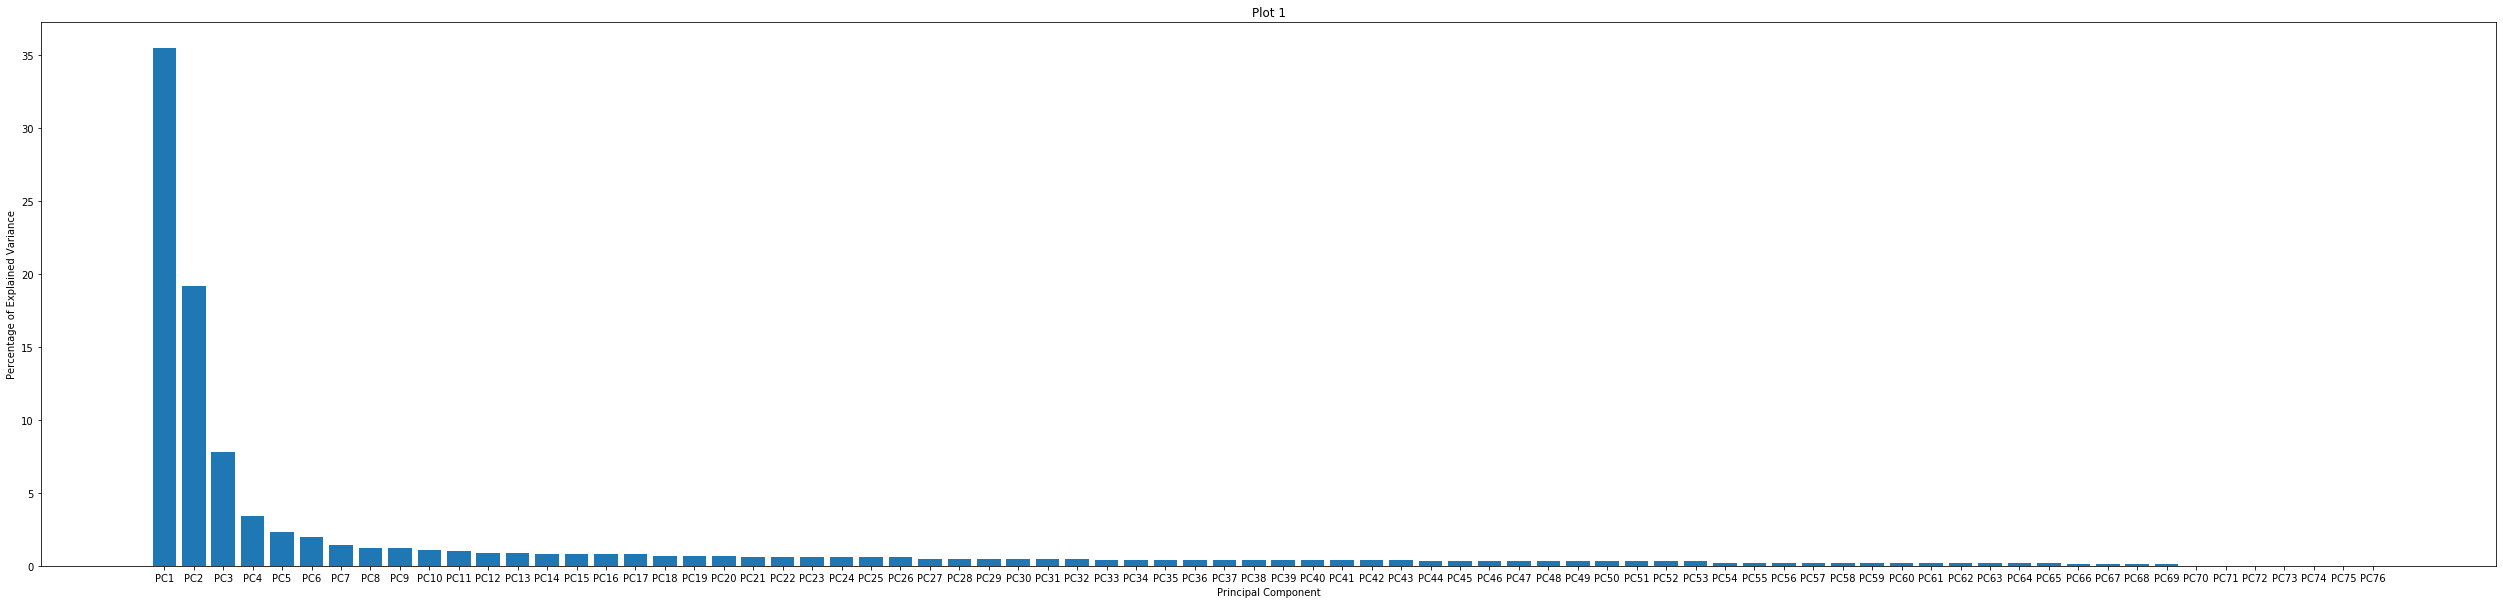

In [22]:
plot_labels = ['PC' + str(s) for s in range(1, len(per_var) + 1)]
plt.figure(figsize = (44, 10))
plt.bar(x = range(1, len(per_var) + 1), height = per_var, tick_label = plot_labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Plot 1')
plt.show()

In [23]:
def plotPCA(label, pc):
    unique_labelClass = np.unique(labelEncoded.transform(label)) 
    nlabels = len(unique_labelClass) 
    fig = plt.figure(figsize = (15, 10))
    ax = fig.add_subplot(111, projection = '3d')
    col = ('tab10' if nlabels <= 10 else  ('tab20' if nlabels <= 20 else 'hsv'))
    cmap = plt.cm.get_cmap('viridis', 8)
    smap = cm.ScalarMappable(norm = mcolors.Normalize(unique_labelClass.min(), unique_labelClass .max() + 1),   cmap=cmap)
    ax.scatter(xs = pc.PC1, ys = pc.PC2, zs = pc.PC3, marker = '.', s = 200, 
               c = labelEncoded.transform(label), cmap = cmap)
    plt.colorbar(mappable = smap, label = 'Label', ticks = range(nlabels))

#per ora ho ignorato " _ " la percentuale di varianza espressa
pc_plot, _ = principalComponent(train.loc[:, train.columns != 'class'], 3)
pc_plot = pd.DataFrame(pc_plot, columns = plot_labels[0 : 3])


plotPCA(labelClass, pc_plot)



## Clustering

In [25]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 8, affinity = 'euclidean', linkage = 'ward')
cluster.fit_predict(train)

linkage = (“ward”, “complete”, “average”, “single”) # così posso provarli tutti 

array([2, 2, 1, 3, 2, 1, 1, 6, 5, 0, 2, 4, 0, 2, 1, 0, 2, 2, 1, 4, 0, 5,
       0, 5, 0, 6, 3, 6, 7, 4, 3, 0, 2, 0, 4, 4, 7, 5, 4, 2, 2, 0, 0, 4,
       6, 1, 3, 5, 1, 0, 0, 1, 2, 1, 0, 6, 3, 5, 0, 3, 2, 3, 1, 0, 2, 3,
       7, 2, 4, 4, 6, 0, 0, 4, 4, 2, 0, 0, 1, 7, 7, 2, 2, 3, 7, 5, 4, 3,
       0, 1, 2, 1, 0, 1, 0, 0, 3, 0, 0, 2, 1, 1, 1, 1, 1, 0, 3, 4, 1, 1,
       4, 0, 0, 0, 1, 3, 1, 0, 7, 5, 0, 2, 2, 2, 7, 0, 3, 7, 0, 3, 6, 7,
       1, 2, 3, 3, 2, 4, 0, 1, 2, 1, 4, 3, 3, 5, 3, 7, 4, 0, 2, 1, 0, 2,
       1, 0, 5, 5, 4, 5, 5, 3, 1, 1, 2, 3, 3, 1, 2, 1, 0, 2, 1, 6, 1, 0,
       4, 0, 1, 0, 0, 6, 5, 0, 7, 5, 3, 1, 3, 1, 4, 0, 5, 1, 1, 2, 6, 2,
       0, 1, 3, 0, 2, 3, 1, 3, 1, 0, 0, 0, 3, 0, 7, 3, 1, 1, 0, 2, 6, 3,
       0, 3, 0, 0, 3, 3, 1, 1, 5, 7, 2, 1, 3, 2, 1, 0, 6, 3, 0, 2, 3, 1,
       5, 3, 2, 7, 3, 5, 0, 5, 7, 5, 2, 1, 1, 3, 5, 5, 5, 2, 0, 7, 6, 5,
       5, 5, 0, 4, 4, 1, 0, 3, 3, 1, 0, 5, 6, 1, 5, 0, 0, 5, 6, 0, 2, 3,
       7, 3, 4, 0, 0, 5, 0, 5, 2, 0, 3, 1, 6, 6, 3,

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage


linkageMatrix = linkage(train, metric = 'euclidean', method = 'ward')
linkageMatrix[:10]



array([[186.        , 205.        ,   1.43505091,   2.        ],
       [165.        , 296.        ,   1.5732557 ,   2.        ],
       [133.        , 140.        ,   1.60512832,   2.        ],
       [ 26.        , 144.        ,   1.64640998,   2.        ],
       [ 98.        , 238.        ,   1.65093386,   2.        ],
       [132.        , 174.        ,   1.67164407,   2.        ],
       [155.        , 352.        ,   1.67599997,   2.        ],
       [ 60.        , 244.        ,   1.6864423 ,   2.        ],
       [252.        , 314.        ,   1.68737287,   2.        ],
       [115.        , 335.        ,   1.69186512,   2.        ]])

In [30]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(Z=None, model=None, X=None, **kwargs):
    annotate_above = kwargs.pop('annotate_above', 0)

    # Reconstruct the linakge matrix if the standard model API was used
    if Z is None:
        if hasattr(model, 'distances_') and model.distances_ is not None:
            # create the counts of samples under each node
            counts = np.zeros(model.children_.shape[0])
            n_samples = len(model.labels_)
            for i, merge in enumerate(model.children_):
                current_count = 0
                for child_idx in merge:
                    if child_idx < n_samples:
                        current_count += 1  # leaf node
                    else:
                        current_count += counts[child_idx - n_samples]
                counts[i] = current_count

            Z = np.column_stack([model.children_, model.distances_,
                                              counts]).astype(float)
        else:
            Z = linkage(X, method=model.linkage, metric=model.affinity)
    
    if 'n_clusters' in kwargs:
        n_clusters = kwargs.pop('n_clusters')
        # Set the cut point just above the last but 'n_clusters' merge
        kwargs['color_threshold'] = Z[-n_clusters, 2] + 1e-6
    
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)
    # Plot the corresponding dendrogram
    ddata = dendrogram(Z, ax=ax, **kwargs) 
    
    # Annotate nodes in the dendrogram
    for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
        x = 0.5 * sum(i[1:3])
        y = d[1]
        nid = np.where(Z[:,2] == y)[0][0]
        if y > annotate_above:
            plt.plot(x, y, 'o', c=c)
            plt.annotate(str(nid-Z.shape[0]), (x, y), xytext=(0, -5),
                         textcoords='offset points',
                         va='top', ha='center')
    if kwargs['color_threshold']:
        plt.axhline(y=kwargs['color_threshold'], c='k')
    
    return fig, ax
   

(<Figure size 1440x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1feb91d0>)

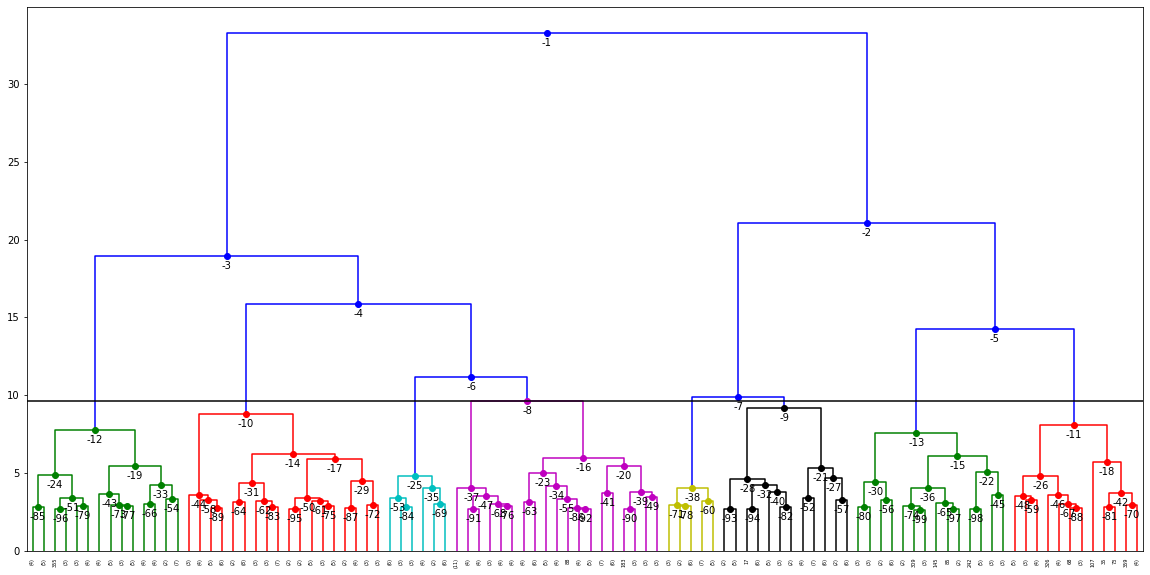

In [34]:
plot_dendrogram(Z = linkageMatrix, X = train,
                truncate_mode='lastp', 
                p=100, n_clusters = 8)

In [39]:
def get_node_leaves(Z, idx, N):
    n1, n2 = Z[idx,0], Z[idx,1]
    leaves = []
    for n in [n1, n2]:
        leaves += [int(n)] if n < N else get_node_leaves(Z, int(n-N), N)
    return leaves

# Plot a number of images (at most maxn) under a cluster/sample id
def plot_node(Z, X, y, idx, maxn=15*15):
    leaves = get_node_leaves(Z, idx, X.shape[0])
    labels, counts = np.unique(y[leaves], return_counts=True)
    nleaves = len(leaves)
    print(pd.DataFrame(np.array(counts).reshape(1,-1), 
                       columns=labels, index=["Frequency:"]))
    print("Images in the cluster:", len(leaves), "/", X.shape[0])

    random.shuffle(leaves)
    leaves = leaves[:maxn]
    h = min((nleaves // 15)+1, 15)
    w = nleaves if nleaves < 15 else 15
    
    fig, axes = plt.subplots(h, w, figsize=(w, h),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

    # For each subfigure (from 0 to 100 in the 10x10 matrix)
    for i, ax in enumerate(axes.flat):
        if i < nleaves:
            ax.imshow(X[leaves[i]].reshape(8,8), cmap='binary', interpolation='nearest')
            ax.text(0.05, 0.05, str(y[leaves[i]]), transform=ax.transAxes, color='r')
        else:
            ax.set_axis_off()

In [40]:
# Plot the first node
# Remember: we expect only two samples,
# the most similar ones in the dataset!
plot_node(linkageMatrix, train, codedLabel, 0)

            7
Frequency:  2
Images in the cluster: 2 / 367


NameError: name 'random' is not defined

In [22]:
from sklearn.cluster import KMeans

In [23]:
clustering = KMeans(n_clusters = 8, random_state = 42)
clustering.fit(train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

array([0, 0, 1, 6, 3, 7, 7, 2, 5, 2, 3, 2, 3, 0, 7, 3, 7, 0, 1, 4, 2, 4,
       2, 5, 3, 6, 6, 6, 7, 4, 6, 3, 0, 2, 4, 4, 7, 5, 4, 0, 0, 3, 2, 4,
       2, 1, 6, 5, 1, 3, 3, 1, 0, 1, 3, 6, 6, 5, 3, 6, 0, 6, 3, 4, 5, 6,
       7, 0, 4, 4, 2, 2, 6, 4, 4, 0, 3, 3, 7, 7, 7, 3, 5, 6, 0, 0, 4, 6,
       3, 1, 0, 7, 2, 7, 3, 1, 6, 2, 3, 7, 7, 1, 7, 1, 1, 3, 6, 4, 1, 1,
       4, 3, 3, 2, 7, 6, 1, 3, 5, 1, 3, 3, 0, 0, 7, 4, 6, 0, 3, 6, 2, 7,
       7, 0, 6, 6, 0, 4, 3, 7, 0, 1, 4, 6, 6, 5, 6, 7, 4, 3, 0, 1, 3, 0,
       1, 3, 5, 5, 4, 0, 5, 6, 7, 7, 5, 6, 6, 7, 0, 7, 3, 3, 1, 6, 6, 2,
       4, 3, 1, 2, 3, 2, 5, 4, 7, 1, 6, 1, 6, 7, 4, 2, 5, 7, 1, 7, 2, 0,
       2, 1, 6, 2, 0, 6, 7, 6, 1, 3, 3, 3, 6, 4, 0, 6, 7, 1, 3, 0, 2, 6,
       3, 6, 2, 3, 6, 6, 7, 1, 5, 7, 0, 1, 6, 0, 1, 3, 6, 6, 3, 0, 6, 7,
       5, 6, 0, 0, 6, 1, 2, 4, 0, 1, 3, 7, 1, 6, 5, 5, 4, 0, 3, 7, 6, 4,
       5, 5, 2, 4, 4, 1, 3, 6, 6, 1, 3, 5, 2, 7, 5, 3, 3, 5, 2, 4, 0, 6,
       0, 6, 4, 3, 3, 5, 3, 1, 0, 0, 6, 1, 6, 2, 6,

## Classification

In [182]:
#train_x, validation_x, train_y, validation_y 
from sklearn.linear_model import LogisticRegression   
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
models = []
models.append(LogisticRegression(solver = "newton-cg", penalty = 'none'))
models.append(LDA())
models.append(QDA(store_covariance = True))
models.append(SVC())
models.append(SVC(kernel = 'linear'))

for model in models:
    model.fit(train_x[var_selected.columns], train_y)
    
    
for model in models:
    print("Score: ", model.score(validation_x[var_selected.columns], validation_y) )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0, store_covariance=True,
                              tol=0.0001)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Score:  0.5540540540540541
Score:  0.527027027027027
Score:  0.7162162162162162
Score:  0.47297297297297297
Score:  0.581081081081081


In [146]:
test = pd.read_csv("Data/test.csv")
t

In [147]:
y_test = test['class']
y_test
test = test.drop(columns = ['class'], axis = 1)

0      c-SC-m
1      c-SC-s
2      c-CS-m
3      t-SC-s
4      c-SC-s
        ...  
240    c-CS-m
241    t-CS-m
242    c-CS-m
243    t-CS-s
244    c-SC-s
Name: class, Length: 245, dtype: object

In [148]:
codedLabelTest = le.transform(labelClass)
codedLabelTest

array([4, 7, 3, 0, 5, 6, 6, 4, 7, 5, 5, 1, 1, 4, 2, 1, 0, 4, 3, 0, 4, 3,
       4, 7, 1, 5, 7, 4, 2, 1, 5, 4, 4, 0, 0, 4, 6, 6, 0, 0, 7, 5, 0, 4,
       5, 7, 5, 4, 3, 0, 5, 3, 0, 3, 0, 1, 3, 7, 1, 7, 4, 1, 7, 4, 7, 7,
       2, 4, 1, 4, 1, 4, 1, 1, 4, 4, 5, 4, 2, 6, 2, 5, 7, 2, 6, 5, 5, 3,
       5, 6, 4, 6, 0, 6, 0, 1, 3, 4, 7, 0, 2, 6, 6, 6, 3, 5, 4, 1, 3, 7,
       7, 0, 5, 4, 3, 5, 6, 1, 7, 7, 1, 5, 4, 4, 6, 1, 7, 2, 1, 3, 5, 2,
       6, 4, 4, 4, 7, 1, 1, 3, 4, 3, 5, 7, 7, 5, 7, 6, 1, 5, 5, 3, 4, 0,
       3, 1, 7, 6, 5, 7, 6, 7, 6, 6, 7, 4, 3, 7, 7, 2, 1, 5, 7, 5, 6, 4,
       1, 5, 3, 4, 5, 1, 4, 1, 6, 3, 7, 3, 3, 2, 1, 5, 6, 6, 3, 7, 5, 4,
       1, 7, 5, 4, 7, 0, 2, 7, 7, 1, 5, 5, 0, 1, 2, 4, 2, 3, 1, 4, 1, 0,
       0, 0, 1, 1, 3, 5, 7, 3, 7, 2, 0, 3, 7, 4, 7, 1, 5, 7, 0, 7, 7, 3,
       6, 4, 4, 6, 3, 3, 0, 3, 7, 7, 5, 2, 3, 5, 7, 7, 3, 4, 1, 2, 4, 3,
       2, 6, 5, 0, 0, 3, 1, 0, 7, 3, 5, 6, 4, 6, 6, 5, 1, 2, 5, 1, 7, 7,
       2, 0, 1, 0, 5, 6, 1, 3, 0, 4, 4, 3, 5, 5, 7,

In [ ]:
from itertools import cycle, islice

##### 